<a href="https://colab.research.google.com/github/18521564/CS114.K21/blob/master/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
from keras import datasets
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report
import itertools

%matplotlib inline

import tensorflow as tf
import numpy as np
from tensorflow import keras

IMG_CHANNELS = 3 #số kênh màu
IMG_ROWS = 32 #chiều ngang
IMG_COLS = 32 #chiều dọc
#các thông số sử dụng sau này:
BATCH_SIZE = 64 #số lượng dữ liệu trong một mini-batch
EPOCHS = 50 #số lần lặp lại training với cùng dữ liệu train
NUM_CLASSES = 10 #số classes đầu ra
VERBOSE = 1 #cách hiển thị để theo dõi quá trình training 

In [ ]:
#hàm tải data bao gồm việc chuẩn hóa và xử lý to_categorical với các label
def load_data():
 (x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
 x_train = x_train.astype('float32')
 x_test = x_test.astype('float32')
 # normalize: chuẩn hóa bằng mean và standard deviation của tập train, tập test sử dụng mean và std từ tập train
 x_train = x_train/255
 x_test = x_test/255
 y_train = tf.keras.utils.to_categorical(y_train,NUM_CLASSES)
 y_test = tf.keras.utils.to_categorical(y_test,NUM_CLASSES)
 return x_train, y_train, x_test, y_test

In [ ]:
# The data, split between train and test sets:
(x_train, y_train, x_test, y_test) = load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 10)
50000 train samples
10000 test samples


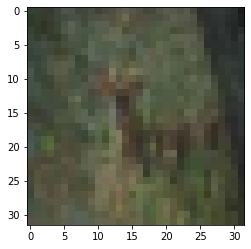

In [ ]:
import matplotlib.pyplot as plt
sample = 10
image = x_train[sample]
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

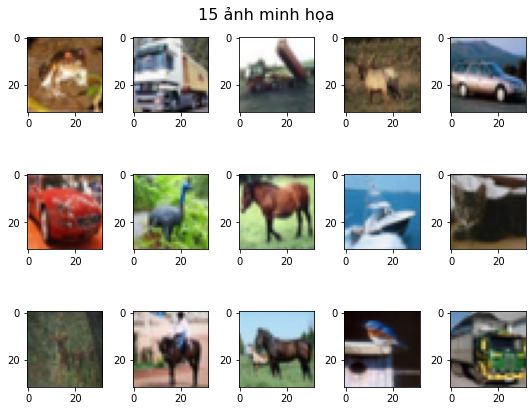

In [ ]:
num_row = 3
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
fig.suptitle("15 ảnh minh họa", fontsize=16)
for i in range(num_row * num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(x_train[i], cmap='gray')
plt.tight_layout()
plt.show()

In [ ]:
X_train=x_train
X_test=x_test
Y_train=y_train
Y_test=y_test
# network and training
EPOCHS = 50
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10   #  # số node đầu ra = số lượng lớp = 10 lớp 0,1,,...,9
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
  
#X_train is 50000 rows of 3x32x32 values --> reshaped in 50000 x 3074
RESHAPED = 3072
#
X_train = X_train.reshape(50000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#xem thêm: https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html

In [ ]:
	#build the model
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(64,
   		input_shape=(RESHAPED,),
   		name='dense_layer', activation='relu'))
model.add(keras.layers.Dense(128,
   		name='dense_layer_2', activation='relu'))
model.add(keras.layers.Dense(256,
   		name='dense_layer_3', activation='relu'))
model.add(keras.layers.Dense(10,
   		name='dense_layer_4', activation='softmax'))


# summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 64)                196672    
_________________________________________________________________
dense_layer_2 (Dense)        (None, 128)               8320      
_________________________________________________________________
dense_layer_3 (Dense)        (None, 256)               33024     
_________________________________________________________________
dense_layer_4 (Dense)        (None, 10)                2570      
Total params: 240,586
Trainable params: 240,586
Non-trainable params: 0
_________________________________________________________________


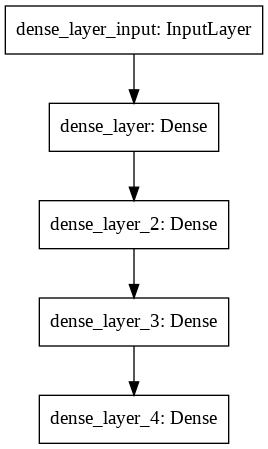

In [ ]:
from tensorflow.keras.utils import  plot_model
plot_model(model, to_file='model_plot.png',show_layer_names=True)

In [ ]:
# compiling the model
model.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from datetime import datetime
from packaging import version

import tensorflow as tf
from tensorflow import keras

print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >= 2, \
    "This notebook requires TensorFlow 2.0 or above."


TensorFlow version:  2.2.0


In [ ]:
# Clear any logs from previous runs
!rm -rf ./logs/ 

In [ ]:
# Define the Keras TensorBoard callback.
#logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
#tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

##training the model
#model.fit(X_train, Y_train,
#		batch_size=BATCH_SIZE, epochs=EPOCHS,
#		verbose=VERBOSE, validation_split=VALIDATION_SPLIT,callbacks=[tensorboard_callback])

model.fit(X_train, Y_train,
		batch_size=BATCH_SIZE, epochs=EPOCHS,
		verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/50
313/313 [==============================] - 2s 7ms/step - loss: 2.1123 - accuracy: 0.2362 - val_loss: 2.0174 - val_accuracy: 0.2569
Epoch 2/50
313/313 [==============================] - 2s 7ms/step - loss: 1.9241 - accuracy: 0.3093 - val_loss: 1.8929 - val_accuracy: 0.3244
Epoch 3/50
313/313 [==============================] - 2s 8ms/step - loss: 1.8501 - accuracy: 0.3413 - val_loss: 1.8515 - val_accuracy: 0.3371
Epoch 4/50
313/313 [==============================] - 2s 7ms/step - loss: 1.7965 - accuracy: 0.3603 - val_loss: 1.7955 - val_accuracy: 0.3613
Epoch 5/50
313/313 [==============================] - 2s 7ms/step - loss: 1.7589 - accuracy: 0.3738 - val_loss: 1.7828 - val_accuracy: 0.3728
Epoch 6/50
313/313 [==============================] - 2s 7ms/step - loss: 1.7265 - accuracy: 0.3868 - val_loss: 1.7761 - val_accuracy: 0.3635
Epoch 7/50
313/313 [==============================] - 3s 8ms/step - loss: 1.6987 - accuracy: 0.3971 - val_loss: 1.7264 - val_accuracy: 0.3813
Epoch 

In [ ]:
#evaluate the model
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc,' Test_loss: ', test_loss)



313/313 [==============================] - 0s 2ms/step - loss: 1.4574 - accuracy: 0.4812
Test accuracy: 0.4812000095844269  Test_loss:  1.4574472904205322


In [ ]:
import numpy as np
#import scipy.misc

from skimage.transform import resize
from imageio import imread

from tensorflow.keras.models import model_from_json
from tensorflow.keras.optimizers import SGD

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


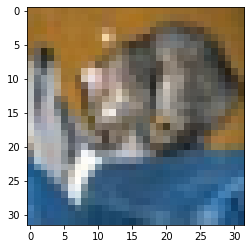

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


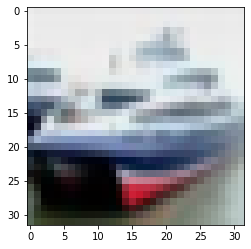

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


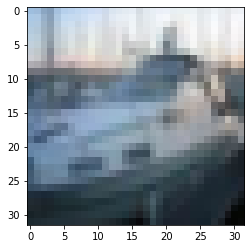

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


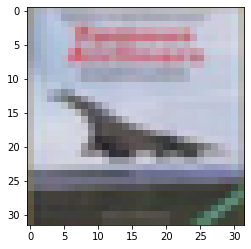

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


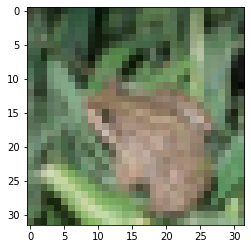

In [ ]:
import matplotlib.pyplot as plt
# making prediction: thử với 5 ảnh đầu tiên trong tập test
for i in range(5):
  plt.imshow(x_test[i])
  print(y_test[i])
  plt.show()
# với nhãn lần lượt là: 3 8 8 0 6

In [ ]:
# making prediction
(a,b),(tx,ty) = datasets.cifar10.load_data()
tx = tx.reshape(10000, RESHAPED)
tx = tx.astype('float32')
predictions = model.predict_classes(tx)

count = 0
for i in range(10):
  print(predictions[i],ty[i])  
  if predictions[i] == ty[i]:
    count = count + 1
print(count)
 #nhãn đúng là 3 8 8 0 6 -> chỉ đúng 1 hình 



3 [3]
8 [8]
0 [8]
0 [0]
4 [6]
3 [6]
1 [1]
2 [6]
5 [3]
9 [1]
4
